In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
from PIL import Image
import math

In [45]:
img = mpimg.imread('/Users/linghua/Desktop/landscape.jpg')  #导入数据   
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

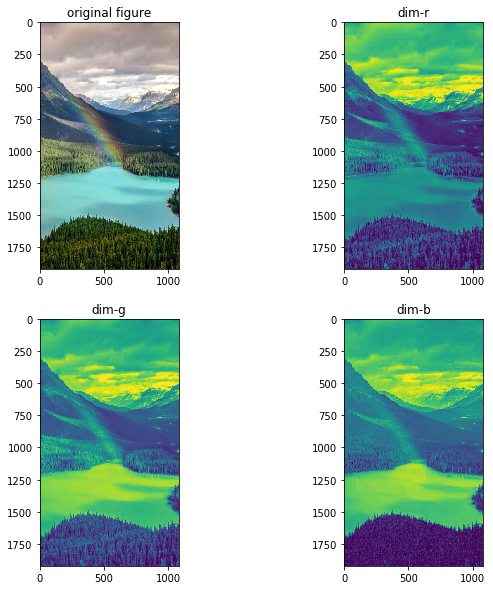

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img)
plt.title("original figure")
plt.subplot(222)
plt.imshow(r)
plt.title("dim-r")
plt.subplot(223)
plt.imshow(g)
plt.title("dim-g")
plt.subplot(224)
plt.imshow(b)
plt.title("dim-b")
plt.show()

In [28]:
def rgb2hsv(r, g, b):
    '''
    rgb转化为hsv
    '''
    r, g, b = r/255.0, g/255.0, b/255.0
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax-cmin
    if cmax == cmin:
        h = 0
    elif cmax == r:
        h = (60 * ((g-b)/delta) + 360) % 360
    elif cmax == g:
        h = (60 * ((b-r)/delta) + 120) % 360
    elif cmax == b:
        h = (60 * ((r-g)/delta) + 240) % 360
    if cmax == 0:
        s = 0
    else:
        s = delta/cmax
    v = cmax
    return h, s, v


def hsv2rgb(h, s, v):
    '''
    hsv转化为rgb
    '''
    h = float(h)
    s = float(s)
    v = float(v)
    h60 = h / 60.0
    h60f = math.floor(h60)
    hi = int(h60f) % 6
    f = h60 - h60f
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)
    r, g, b = 0, 0, 0
    if hi == 0: r, g, b = v, t, p
    elif hi == 1: r, g, b = q, v, p
    elif hi == 2: r, g, b = p, v, t
    elif hi == 3: r, g, b = p, q, v
    elif hi == 4: r, g, b = t, p, v
    elif hi == 5: r, g, b = v, p, q
    r, g, b = int(r * 255), int(g * 255), int(b * 255)
    return r, g, b


In [31]:
im = Image.open('/Users/linghua/Desktop/landscape.jpg') #读取图片
pix = im.load()
width = im.size[0]   #获得图片形状参数
height = im.size[1]
hsv = []
for x in range(width):    ##将像素点以tuple的形式平铺成hsv
    for y in range(height):
        r, g, b= pix[x, y]
        h,s,v = rgb2hsv(r, g, b)
        hsv.append((h,s,v))  
        
H = [i[0] for i in hsv]
S = [i[1] for i in hsv]
V = [i[2] for i in hsv]

H = np.array(H).reshape((width,height))   ##将像素排列成图像的形状，注意此时图片的形状参数发生转置
S = np.array(S).reshape((width,height))
V = np.array(V).reshape((width,height))



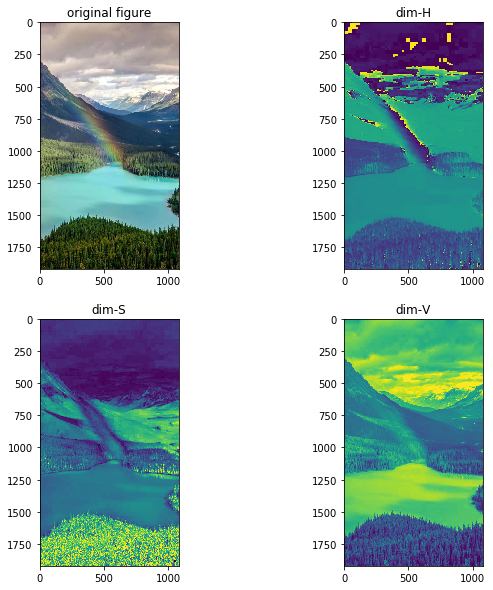

In [57]:
plt.figure(figsize=(10,10)) #规定图像大小
plt.subplot(221)
plt.imshow(img)
plt.title("original figure")
plt.subplot(222)
plt.imshow(H.T) #注意转置
plt.title("dim-H") 
plt.subplot(223)
plt.imshow(S.T) #注意转置
plt.title("dim-S")
plt.subplot(224)
plt.imshow(V.T) #注意转置
plt.title("dim-V")
plt.show()

In [37]:
rgb = []
for i in hsv:
    h,s,v = i
    rgb.append((hsv2rgb(h, s, v)))

R = [i[0] for i in rgb]
G = [i[1] for i in rgb]
B = [i[2] for i in rgb]

R = np.array(R).reshape((width,height))  ##将像素排列成图像的形状，注意此时图片的形状参数发生转置
G = np.array(G).reshape((width,height))
B = np.array(B).reshape((width,height))

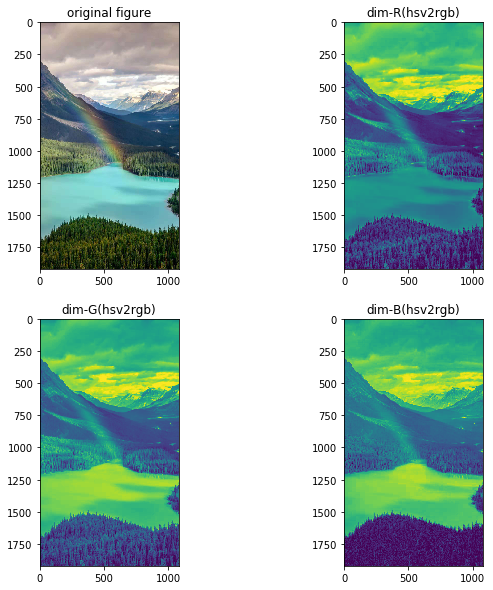

In [58]:
plt.figure(figsize=(10,10)) #规定图像大小
plt.subplot(221)
plt.imshow(img)
plt.title("original figure")
plt.subplot(222)
plt.imshow(R.T)#注意转置
plt.title("dim-R(hsv2rgb)")
plt.subplot(223)
plt.imshow(G.T)#注意转置
plt.title("dim-G(hsv2rgb)")
plt.subplot(224)
plt.imshow(B.T)#注意转置
plt.title("dim-B(hsv2rgb)")
plt.show()